# Bagging, Random Forests, and Boosting

In this notebook, 
we will talk about bagging and random forests and apply them to the Boston data, 
using the _randomForest_ package in R. 
We will see that Bagging is a special case of a random forest. 
Therefore, the `randomForest()` function can be used to perform both random forests and bagging. 


### Bagging

The decision trees discussed previously suffer from high variance. 
This means that if we split the training data into two parts at random, 
and fit a decision tree to both halves, 
the results that we get could be quite different. 
In contrast, a procedure with low variance will yield similar results if applied repeatedly to distinct data sets. 
**Bootstrap aggregation**, or _bagging_, 
is a general-purpose procedure for reducing the variance of a statistical learning method.
We introduce it here because it is particularly useful and frequently used in the context of decision trees.

Given a set of $n$ independent observations $Z_1, . . . , Z_n$, 
each with variance $\sigma^2$, the variance of the mean $\hat{Z}$ of the observations is given by $\sigma^2/n$. 
In other words, _averaging a set of observations reduces variance_.
Hence, a natural way to reduce the variance and increase the prediction accuracy 
of a statistical learning method is to take many training sets from the population, 
build a separate prediction model using each training set, 
and average the resulting predictions. 

In other words, we could calculate $\hat{f}^1(x), \hat{f}^2(x), . . . , \hat{f}^B(x)$ 
using B separate training sets, and average them in order to obtain a single low-variance 
statistical learning model, given by

$$\hat{f}_{avg}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}^b(x) $$

However, this is not practical because we generally do not have access to multiple training sets. 
Instead, we can bootstrap, by taking repeated samples from the (single) training data set. 
In this approach we generate B different bootstrapped training data sets. 
We then train our method on the `b`th bootstrapped training set in order to get $\hat{f}^{∗b}(x)$, 
and finally average all the predictions, to obtain

$$\hat{f}_{bag}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}^{*b}(x) $$

** This is called bagging. **


####  How bagging is useful in trees 

While bagging can improve predictions for many regression methods, 
it is particularly useful for decision trees. 
To apply bagging to regression trees, 
we simply construct B regression trees using B bootstrapped training sets, and average the resulting predictions. These trees are grown deep, and are not pruned. 
Hence, each individual tree has high variance, but low bias. 
Averaging these B trees reduces the variance. 
Bagging has been demonstrated to give impressive improvements in accuracy by combining 
together hundreds or even thousands of trees into a single procedure. 
Thus far, we have described the bagging procedure in the regression context, 
to predict a quantitative outcome Y.

How can bagging be extended to a classification problem where Y is qualitative? 
In that situation, there are a few possible approaches, but the simplest is as follows. 
For a given test observation, we can record the class predicted by each of the B trees, 
and take a majority vote: the overall prediction is the most commonly occurring class among the B predictions.

##### Out-of-Bag Error Estimation 

Recall that the key to bagging is that trees are repeatedly fit to bootstrapped subsets of the observations. 
On average, each bagged tree makes use of around two-thirds of the observations. 
The remaining one-third of the observations not used to fit a given bagged tree are 
referred to as the out-of-bag (OOB) observations. 
We can predict the response for the $ith$ observation using each of the trees in which that observation was OOB. This will yield around B/3 predictions for the $ith$ observation. 

In order to obtain a single prediction for the $ith$ observation, 
we can average these predicted responses (if regression is the goal) 
or can take a majority vote (if classification is the goal). 
This leads to a single OOB prediction for the $ith$ observation. 
An OOB prediction can be obtained in this way for each of the n observations, 
from which the overall OOB MSE (for a regression problem) or 
classification error (for a classification problem) can be computed.




##### Variable Importance Measures

Bagging typically results in improved accuracy over prediction using a single tree.
Unfortunately, it can be difficult to interpret the resulting model. 
One of the advantages of decision trees is the easily interpreted diagram that results. 
However, when we bag a large number of trees it is no longer possible to represent the 
resulting statistical learning procedure using a single tree, 
and it is no longer clear which variables are most important to the procedure. 
Thus, **bagging improves prediction accuracy at the expense of interpretability**.

Although the collection of bagged trees is much more difficult to interpret than a single tree, 
one can obtain an overall summary of the importance of each predictor using the 
RSS (for bagging regression trees) or the Gini index (for bagging classification trees).



In the case of bagging regression trees, we can record the total amount that the RSS is decreased
due to splits over a given predictor, averaged over all B trees. 
A large value indicates an important predictor. 
Similarly, in the context of bagging classification trees, 
we can add up the total amount that the Gini index is decreased by splits over a given predictor, 
averaged over all the trees.

A graphical representation of the variable importances in the `Heart` data is shown in the below figure. 
We see the mean decrease in Gini index for each variable, relative to the largest. 
The variables with the largest mean decrease in Gini index are `Thal`, `Ca`, and `ChestPain`.

<img src="../images/var_imp.PNG" height=600 width=400>

### Random Forest

Random forests provide an improvement over bagged trees by way of a small tweak that _decorrelates the trees_.
As in bagging, we build a number of decision trees on bootstrapped training samples. 
But when building these decision trees, each time a split in a tree is considered, 
a random sample of `m` predictors is chosen as split candidates from the full set of p predictors.
The split is allowed to use only one of those m predictors. 
A fresh sample of m predictors is taken at each split, 
and typically we choose $m \approx \sqrt{p}$ that is, 
the number of predictors considered at each split is approximately equal to 
the square root of the total number of predictors (4 out of the 13 for the `Heart` data).


In building a random forest, at each split in the tree, 
the algorithm is not even allowed to consider a majority of the available predictors. 
There is a clever rationale behind this idea. 
Suppose that there is one very strong predictor in the data set, 
along with a number of other moderately strong predictors. 
Then in the collection of bagged trees,
most or all of the trees will use this strong predictor in the top split. 

Consequently, all of the bagged trees will look quite similar to each other.
Hence, the predictions from the bagged trees will be highly correlated. 
Unfortunately, averaging many highly correlated quantities does not lead to as large of a 
reduction in variance as averaging many uncorrelated quantities. 
In particular, this means that bagging will not lead to a substantial reduction 
in variance over a single tree in this setting.

Random forests overcome this problem by forcing each split to consider only a subset of the predictors. 
Therefore, on average $(p − m)/p$ of the splits will not even consider the strong predictor, 
and so other predictors will have more of a chance. 
We can think of this process as **decorrelating the trees**.

The main difference between bagging and random forests is the choice of predictor subset size m. 
For instance, if a random forest is built using m = p, then this amounts simply to bagging. 
On the `Heart` data, random forests using $m \approx \sqrt{p}$ leads to a reduction in both test error and OOB error over bagging.

### Boosting

Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, 
fitting a separate decision tree to each copy, 
and then combining all of the trees in order to create a single predictive model. 
Notably, each tree is built on a bootstrap data set, independent of the other trees. 
Boosting works in a similar way, except that the trees are grown sequentially: 
each tree is grown using information from previously grown trees. 
Boosting does not involve bootstrap sampling; 
instead each tree is fit on a modified version of the original data set.

Like bagging, boosting involves combining a large number of decision trees, $\hat{f}^1, . . . , \hat{f}^B$. 
However, the boosting approach instead learns slowly. 
Given the current model, we fit a decision tree to the residuals from the model. 
That is, we fit a tree using the current residuals, rather than the outcome $Y$, as the response. 
We then add this new decision tree into the fitted function in order to update the residuals. 
Each of these trees can be rather small, with just a few terminal nodes, 
determined by the parameter `d` in the algorithm. 
By fitting small trees to the residuals, we slowly improve $\hat{f}$ in areas where it does not perform well. 
The shrinkage parameter $\lambda$ slows the process down even further, 
allowing more and different shaped trees to attack the residuals.


### Bagging and Random Forests in R

We will apply bagging and random forests to the Boston data, using the randomForest package. 
Bagging is simply a special case of a random forest with $m = p$ 
(where m is the number of predictors selected to build the model 
and p is the total number of predictors available).
Therefore, the `randomForest()` function can be used to perform both random forests and bagging. 

**We perform bagging as follows:**

In [1]:
library(randomForest)
library(MASS)
set.seed(1)
train = sample (1: nrow(Boston ), nrow(Boston )/2)
bag.boston =randomForest(medv~.,data=Boston, subset=train, mtry=13, importance=TRUE)
bag.boston

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 10.80817
                    % Var explained: 86.91

The argument `mtry=13` indicates that all 13 predictors should be considered for each split of the tree; 
in other words, that bagging should be done. 
How well does this bagged model perform on the test set?

We will compare to a boosting approach!

[1] 13.444

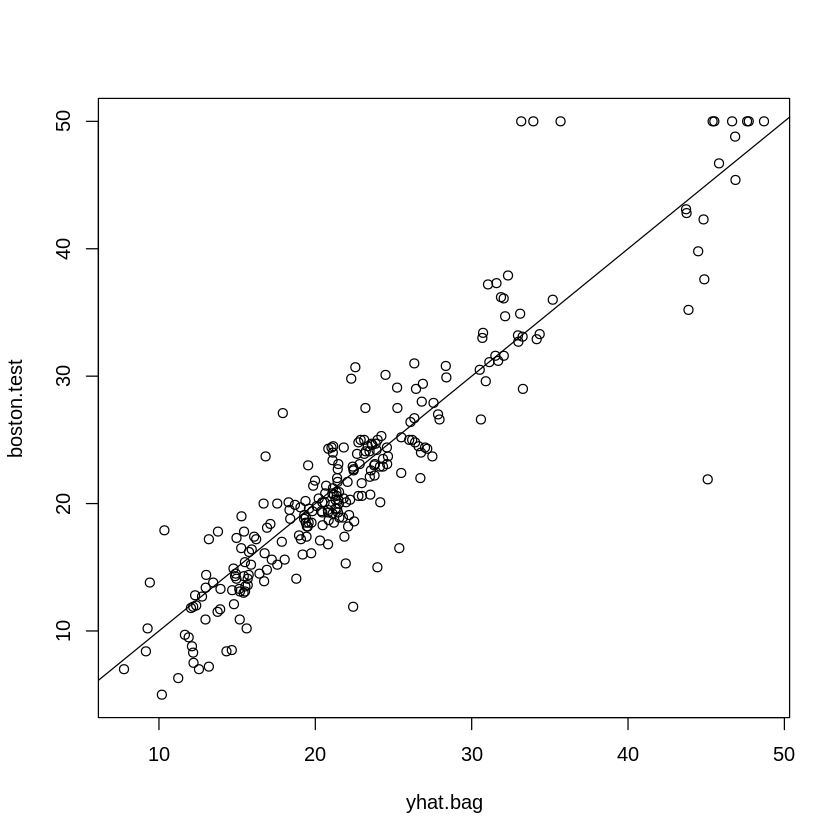

In [2]:
yhat.bag = predict (bag.boston, newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
plot(yhat.bag, boston.test)
abline(0,1)
mean((yhat.bag - boston.test)^2)

The test setMSE associated with the bagged regression tree is approximately 13.33, 
almost half that obtained using an optimally-pruned single tree. 
We could change the number of trees grown by `randomForest()` using the `ntree` argument:

In [3]:
bag.boston=randomForest(medv~., data=Boston, subset=train, mtry=13, ntree=25)
yhat.bag = predict(bag.boston, newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)

[1] 13.67774

Growing a random forest proceeds in exactly the same way, 
except that we use a smaller value of the `mtry` argument. 
By default, `randomForest()` uses $p/3$ variables when building a random forest of regression trees, 
and $\sqrt{p}$ variables when building a random forest of classification trees. 
Here we use `mtry = 6`.

In [4]:
set.seed (1)
rf.boston=randomForest(medv~.,data=Boston, subset=train, mtry=6, importance=TRUE)
yhat.rf = predict(rf.boston, newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)

[1] 11.66454

The test set MSE is 11.48; this indicates that random forests yielded an improvement over bagging in this case. Using the `importance()` function, we can view the importance of each variable.

In [5]:
importance(rf.boston)

,%IncMSE,IncNodePurity
crim,12.132320,986.50338
zn,1.955579,57.96945
indus,9.069302,882.78261
chas,2.210835,45.22941
nox,11.104823,1044.33776
rm,31.784033,6359.31971
age,10.962684,516.82969
dis,15.015236,1224.11605
rad,4.118011,95.94586
tax,8.587932,502.96719


Two measures of variable importance are reported. 
The first is based upon the mean decrease of accuracy in predictions on the 
out of bag samples when a given variable is excluded from the model. 
The second is a measure of the total decrease in node impurity that results from splits over that variable, 
averaged over all trees. 
In the case of regression trees, the node impurity is measured by the training RSS, 
and for classification trees by the deviance.

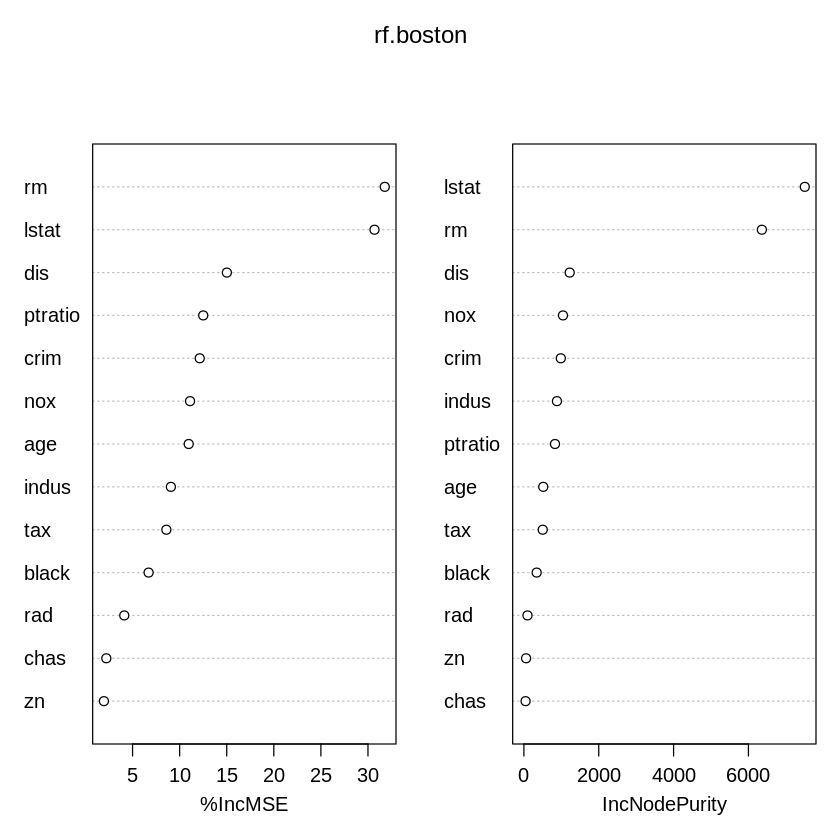

In [6]:
varImpPlot(rf.boston)

#### Boosting in R

We will use the `gbm` package, and within it the `gbm()` function, 
to fit boosted regression trees to the Boston data set. 
We run `gbm()` with the option `distribution="gaussian"` if it's a regression problem. 
If it's a binary classification problem, we would use `distribution="bernoulli"`. 
The argument `n.trees=5000` indicates that we want 5000 trees and the option `interaction.depth=4` limits the depth of each tree.

In [8]:
#
install.packages('gbm')
library(gbm)
set.seed(1)
boost.boston=gbm(medv~.,data=Boston[train,], distribution="gaussian",n.trees=5000, interaction.depth=4)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loaded gbm 2.1.8


The summary() function produces a relative influence plot and also outputs the relative influence statistics.

,var,rel.inf
,<fct>,<dbl>
lstat,lstat,37.0661275
rm,rm,25.3533123
dis,dis,11.7903016
crim,crim,8.0388750
black,black,4.2531659
nox,nox,3.5058570
age,age,3.4868724
ptratio,ptratio,2.2500385
indus,indus,1.7725070


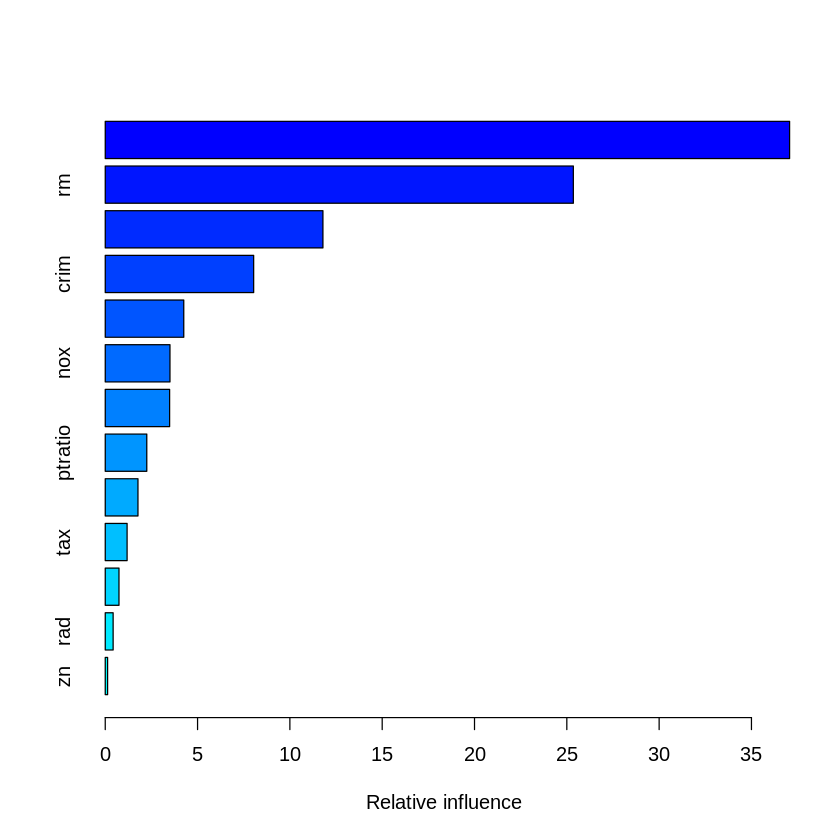

In [9]:
summary(boost.boston)

# Save your notebook!